<a href="https://colab.research.google.com/github/Lakshmirajeevreddy/My-Projects/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
# Importing the Keras libraries and packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Importing the training set

In [5]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling

In [6]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output

In [7]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping

In [9]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Initialising the RNN

In [10]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation

In [15]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer

In [16]:
regressor.add(Dense(units = 1))

# Compiling the RNN

In [17]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set

In [18]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 13s 121ms/step - loss: 0.0384
Epoch 2/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0077
Epoch 3/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 6s 147ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0050
Epoch 8/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0043
Epoch 9/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 5s 121ms/step - loss: 0.0038
Epoch 13/100

Making the predictions and visualising the results

In [19]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [20]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [21]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results

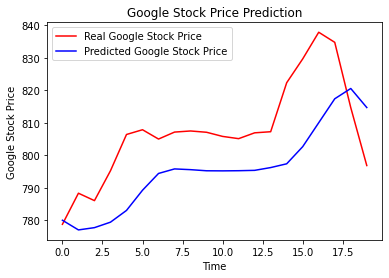

In [22]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [23]:
! zip data.zip *.csv

  adding: Google_Stock_Price_Test.csv (deflated 56%)
  adding: Google_Stock_Price_Train.csv (deflated 64%)
